# Multi variable comparison
Assessing both wave height and wind speed at the same time

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from fmskill import ModelResult, ModelResultCollection, PointObservation, TrackObservation

In [2]:
%load_ext autoreload
%autoreload 2

## Define observations
Below, the observations will take the default variable names from the eum type of the item. Alternatively, the user can give another variable name by providing the `variable_name` argument.

In [3]:
# wave height
o1 = PointObservation('../tests/testdata/SW/HKNA_Hm0.dfs0', item=0, x=4.2420, y=52.6887, name="HKNA_Hm0")
o2 = PointObservation("../tests/testdata/SW/eur_Hm0.dfs0", item=0, x=3.2760, y=51.9990, name="EPL_Hm0")
o3 = TrackObservation("../tests/testdata/SW/Alti_c2_Dutch.dfs0", item=3, name="c2_Hm0")

# wind speed
wind1 = PointObservation('../tests/testdata/SW/HKNA_wind.dfs0', item=0, x=4.2420, y=52.6887, name="HKNA_wind")
wind2 = PointObservation('../tests/testdata/SW/F16_wind.dfs0', item=0, x=4.01222, y=54.1167, name="F16_wind")
wind3 = TrackObservation("../tests/testdata/SW/Alti_c2_Dutch.dfs0", item=2, name="c2_wind")

In [4]:
o1.variable_name

'Significant_wave_height'

## Define model results
Two different model results are defined.

In [5]:
mr1 = ModelResult('../tests/testdata/SW/HKZN_local_2017_DutchCoast.dfsu', name='SW_1')
mr2 = ModelResult('../tests/testdata/SW/HKZN_local_2017_DutchCoast_v2.dfsu', name='SW_2')

In [6]:
mr1.dfs.items

[Sign. Wave Height <Significant wave height> (meter),
 Max. Wave Height <Maximum wave height> (meter),
 Peak Wave Period <Wave period> (second),
 Wave Period, T01 <Wave period> (second),
 Wave Period, T02 <Wave period> (second),
 Peak Wave Direction <Wave direction> (radian),
 Mean Wave Direction <Mean Wave Direction> (degree),
 Dir. Stand. Deviation <Directional Standard Deviation> (degree),
 x-comp. of wave height vector <u velocity component> (meter per sec),
 y-comp. of wave height vector <v velocity component> (meter per sec),
 Surface elevation <Surface Elevation> (meter),
 Current velocity, U <u velocity component> (meter per sec),
 Current velocity, V <v velocity component> (meter per sec),
 Wind speed <Wind speed> (meter per sec),
 Wind direction <Wind Direction> (degree)]

## Associate model and observations and extract
We match the observation item and model item by refering to the item name in the ModelResult. Item number can also be used.

In [7]:
mr = ModelResultCollection([mr1, mr2])
#mr = mr1

In [8]:
mr.add_observation(o1, item='Sign. Wave Height')
mr.add_observation(o2, item='Sign. Wave Height')
mr.add_observation(o3, item='Sign. Wave Height')
mr.add_observation(wind1, item='Wind speed')
mr.add_observation(wind2, item='Wind speed')
mr.add_observation(wind3, item='Wind speed')
mr.observations

{'HKNA_Hm0': PointObservation: HKNA_Hm0, x=4.242, y=52.6887,
 'EPL_Hm0': PointObservation: EPL_Hm0, x=3.276, y=51.999,
 'c2_Hm0': TrackObservation: c2_Hm0, n=298,
 'HKNA_wind': PointObservation: HKNA_wind, x=4.242, y=52.6887,
 'F16_wind': PointObservation: F16_wind, x=4.01222, y=54.1167,
 'c2_wind': TrackObservation: c2_wind, n=298}

In [9]:
cc = mr.extract() 

In [10]:
cc.n_variables

2

In [11]:
cc.var_names

['Significant_wave_height', 'Wind_speed']

## Analysis
Now that the result has been extracted, we can do analysis. Multiple variables means an extra level in the multi-index of the skill dataframe. 

In [12]:
df = cc.skill()
df

n      bias      rmse     urmse  \
model observation variable                                                     
SW_1  EPL_Hm0     Significant_wave_height   66 -0.075335  0.216357  0.202817   
      F16_wind    Wind_speed                67  2.102049  2.775330  1.812140   
      HKNA_Hm0    Significant_wave_height  385 -0.195266  0.352283  0.293214   
      HKNA_wind   Wind_speed               277 -0.880928  1.276179  0.923363   
      c2_Hm0      Significant_wave_height  113 -0.001210  0.351796  0.351794   
      c2_wind     Wind_speed               113  0.408558  0.637718  0.489657   
SW_2  EPL_Hm0     Significant_wave_height   66 -0.007782  0.225996  0.225862   
      F16_wind    Wind_speed                67  2.102049  2.775330  1.812140   
      HKNA_Hm0    Significant_wave_height  385 -0.101189  0.293247  0.275235   
      HKNA_wind   Wind_speed               277 -0.880928  1.276179  0.923363   
      c2_Hm0      Significant_wave_height  113  0.081431  0.430268  0.422492   
      c2_wind     Wind_speed               113  0.408558  0.637718  0.489657   

                                                mae        cc        si  \
model observation variable                                                
SW_1  EPL_Hm0     Significant_wave_height  0.183641  0.972467  0.073902   
      F16_wind    Wind_speed               2.196785  0.824620  0.136781   
      HKNA_Hm0    Significant_wave_height  0.251992  0.971082  0.088488   
      HKNA_wind   Wind_speed               1.023092  0.962845  0.064528   
      c2_Hm0      Significant_wave_height  0.294585  0.974335  0.118511   
      c2_wind     Wind_speed               0.505665  0.960284  0.049998   
SW_2  EPL_Hm0     Significant_wave_height  0.193719  0.972467  0.082298   
      F16_wind    Wind_speed               2.196785  0.824620  0.136781   
      HKNA_Hm0    Significant_wave_height  0.214476  0.971082  0.083062   
      HKNA_wind   Wind_speed               1.023092  0.962845  0.064528   
      c2_Hm0      Significant_wave_height  0.357138  0.974335  0.142327   
      c2_wind     Wind_speed               0.505665  0.960284  0.049998   

                                                 r2  
model observation variable                           
SW_1  EPL_Hm0     Significant_wave_height  0.993785  
      F16_wind    Wind_speed               0.956117  
      HKNA_Hm0    Significant_wave_height  0.988697  
      HKNA_wind   Wind_speed               0.992046  
      c2_Hm0      Significant_wave_height  0.985955  
      c2_wind     Wind_speed               0.995760  
SW_2  EPL_Hm0     Significant_wave_height  0.993219  
      F16_wind    Wind_speed               0.956117  
      HKNA_Hm0    Significant_wave_height  0.992168  
      HKNA_wind   Wind_speed               0.992046  
      c2_Hm0      Significant_wave_height  0.978991  
      c2_wind     Wind_speed               0.995760

In [13]:
df.index.names

FrozenList(['model', 'observation', 'variable'])

In [14]:
cc.skill(variable='Wind_speed')

variable    n      bias      rmse     urmse       mae  \
model observation                                                            
SW_1  F16_wind     Wind_speed   67  2.102049  2.775330  1.812140  2.196785   
      HKNA_wind    Wind_speed  277 -0.880928  1.276179  0.923363  1.023092   
      c2_wind      Wind_speed  113  0.408558  0.637718  0.489657  0.505665   
SW_2  F16_wind     Wind_speed   67  2.102049  2.775330  1.812140  2.196785   
      HKNA_wind    Wind_speed  277 -0.880928  1.276179  0.923363  1.023092   
      c2_wind      Wind_speed  113  0.408558  0.637718  0.489657  0.505665   

                         cc        si        r2  
model observation                                
SW_1  F16_wind     0.824620  0.136781  0.956117  
      HKNA_wind    0.962845  0.064528  0.992046  
      c2_wind      0.960284  0.049998  0.995760  
SW_2  F16_wind     0.824620  0.136781  0.956117  
      HKNA_wind    0.962845  0.064528  0.992046  
      c2_wind      0.960284  0.049998  0.995760

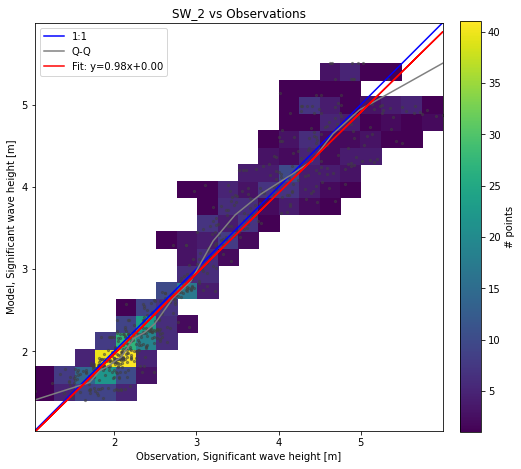

In [15]:
cc.scatter(model=1)

## mean skill
The `mean_skill()` method will return a weighted average of the skill score per model and variable. You can get the "normal" mean_skill (per model) by selecting a specific variable either by id or name.

In [16]:
cc.mean_skill()

n      bias      rmse     urmse       mae  \
model variable                                                               
SW_1  Significant_wave_height  564 -0.090604  0.306812  0.282609  0.243406   
      Wind_speed               457  0.543226  1.563076  1.075053  1.241847   
SW_2  Significant_wave_height  564 -0.009180  0.316503  0.307863  0.255111   
      Wind_speed               457  0.543226  1.563076  1.075053  1.241847   

                                     cc        si        r2  
model variable                                               
SW_1  Significant_wave_height  0.972628  0.093634  0.989479  
      Wind_speed               0.915916  0.083769  0.981308  
SW_2  Significant_wave_height  0.972628  0.102563  0.988126  
      Wind_speed               0.915916  0.083769  0.981308

In [17]:
cc.mean_skill(model='SW_2')

,model,n,bias,rmse,urmse,mae,cc,si,r2
variable,,,,,,,,,
Significant_wave_height,SW_2,564,-0.009180,0.316503,0.307863,0.255111,0.972628,0.102563,0.988126
Wind_speed,SW_2,457,0.543226,1.563076,1.075053,1.241847,0.915916,0.083769,0.981308


In [18]:
df = cc.mean_skill(variable='Wind_speed')
df

,variable,n,bias,rmse,urmse,mae,cc,si,r2
model,,,,,,,,,
SW_1,Wind_speed,457,0.543226,1.563076,1.075053,1.241847,0.915916,0.083769,0.981308
SW_2,Wind_speed,457,0.543226,1.563076,1.075053,1.241847,0.915916,0.083769,0.981308


## score

In [19]:
cc.score()

{'SW_1': 0.9349438989181208, 'SW_2': 0.9397895582539258}

In [20]:
cc.score(model='SW_1')

0.9349438989181208

In [21]:
cc.score(variable='Wind_speed')

{'SW_1': 1.5630757331111964, 'SW_2': 1.5630757331111964}